In [32]:
from pandas import read_csv

In [33]:
detached = read_csv("dataset_detached.csv")
condo = read_csv('dataset_condo.csv')

In [34]:
condo

,Price,Increse_Rate
0,323250.0,0.03
1,320250.0,-0.02
2,330500.0,0.00
3,335000.0,0.01
4,336000.0,0.00
...,...,...
105,655000.0,0.13
106,648000.0,0.14
107,651000.0,0.15
108,708000.0,0.28


In [35]:
detached

,Price,Increse_Rate
0,599450,0.0498
1,667000,0.0287
2,669500,0.0712
3,682000,0.0479
4,660500,0.0231
...,...,...
105,1438000,0.2238
106,1437250,0.1904
107,1435000,0.1686
108,1580000,0.2481


In [36]:
price_detached = detached["Price"]
Increase_rate_detached = detached["Increse_Rate"]
price_data_detached=price_detached.values.tolist()
Increase_rate_data_detached = Increase_rate_detached.values.tolist()


In [37]:
price_condo = condo["Price"]
Increase_rate_condo = condo["Increse_Rate"]
price_data_condo=price_condo.values.tolist()
Increase_rate_data_condo = Increase_rate_condo.values.tolist()

In [38]:
from pandas import Series
from pandas import date_range
idx = date_range('2013-01-01',periods=110,freq='M')
price_ts_detached = Series(price_data_detached, index=idx)
Increase_rate_ts_detached = Series(Increase_rate_data_detached, index=idx)
price_ts_condo = Series(price_data_condo, index=idx)
Increase_rate_ts_condo = Series(Increase_rate_data_condo, index=idx)

In [40]:
price_ts_condo


2013-01-31    323250.0
2013-02-28    320250.0
2013-03-31    330500.0
2013-04-30    335000.0
2013-05-31    336000.0
                ...   
2021-10-31    655000.0
2021-11-30    648000.0
2021-12-31    651000.0
2022-01-31    708000.0
2022-02-28    745000.0
Freq: M, Length: 110, dtype: float64

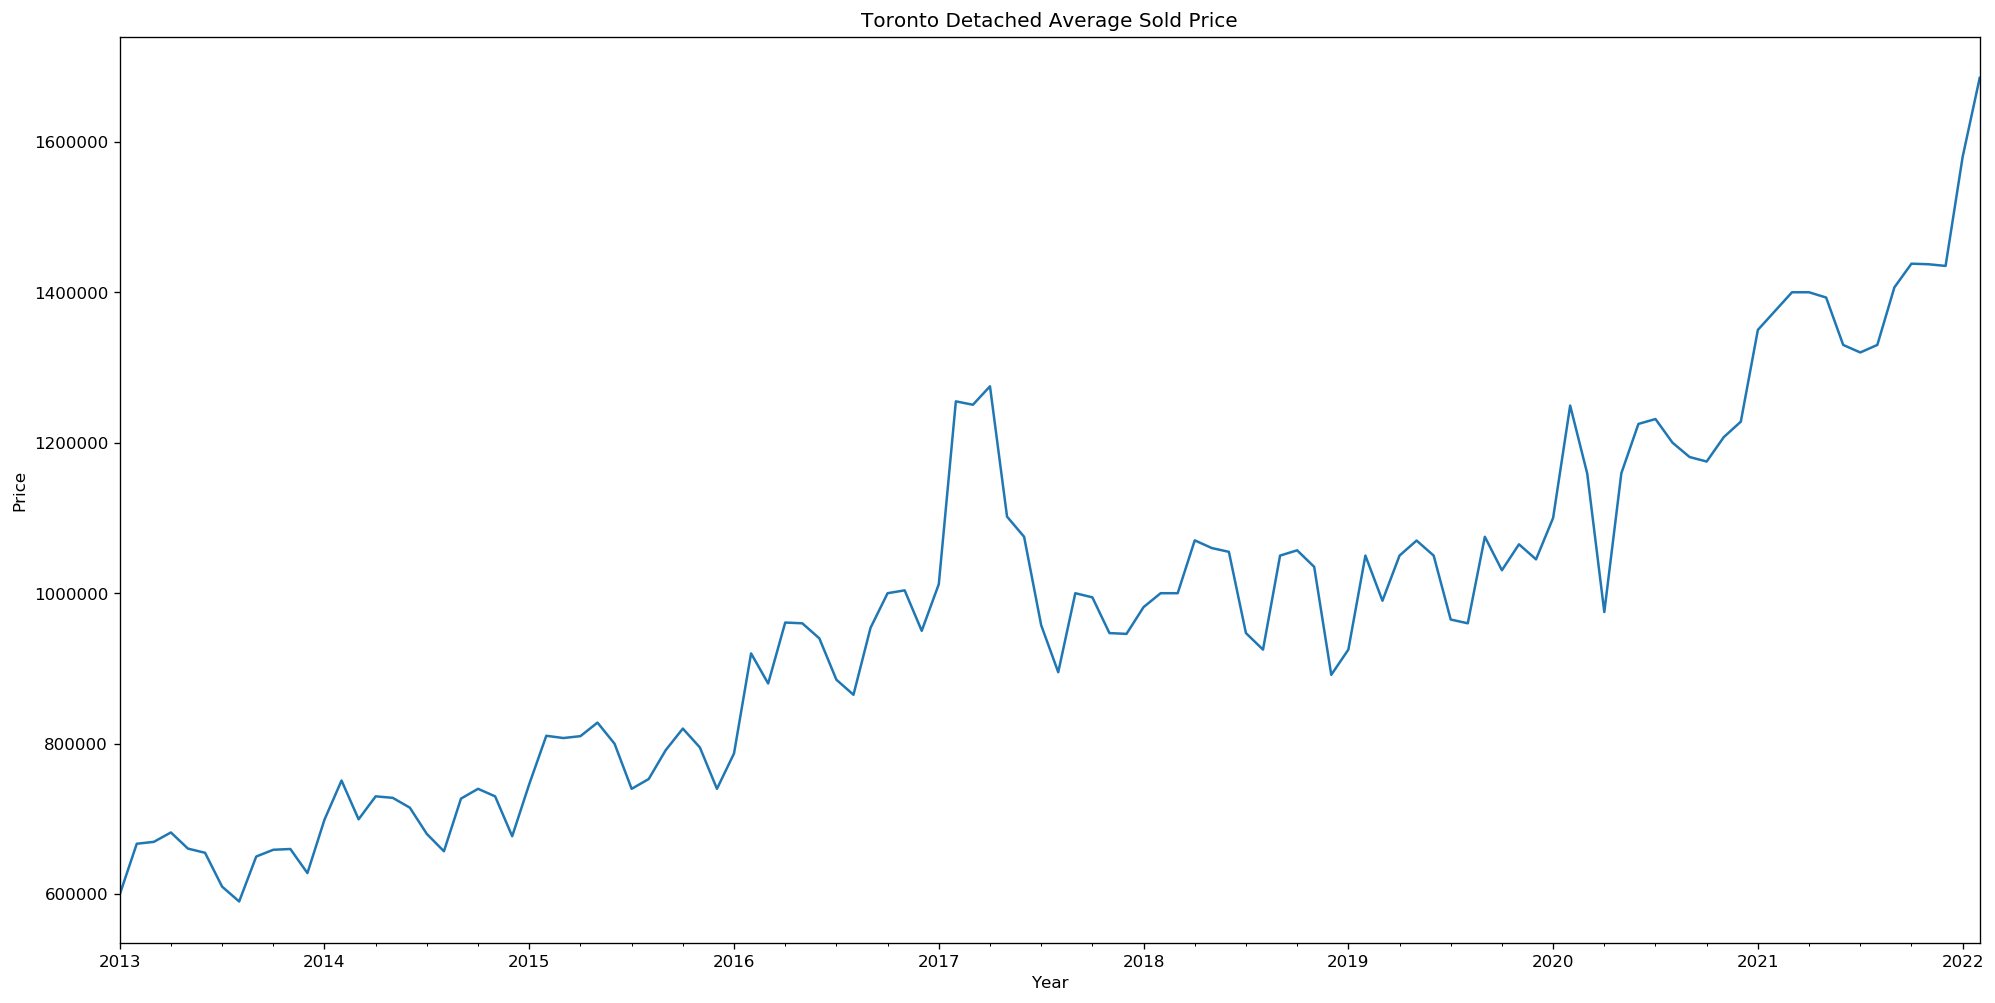

In [304]:
import matplotlib.pyplot as plt
price_ts_detached.plot(title='Toronto Detached Average Sold Price', fontsize=10,figsize=(20,10))  
plt.xlabel('Year',fontsize=10)
plt.ylabel('Price',fontsize=10);
#plt.tight_layout()
plt.show()

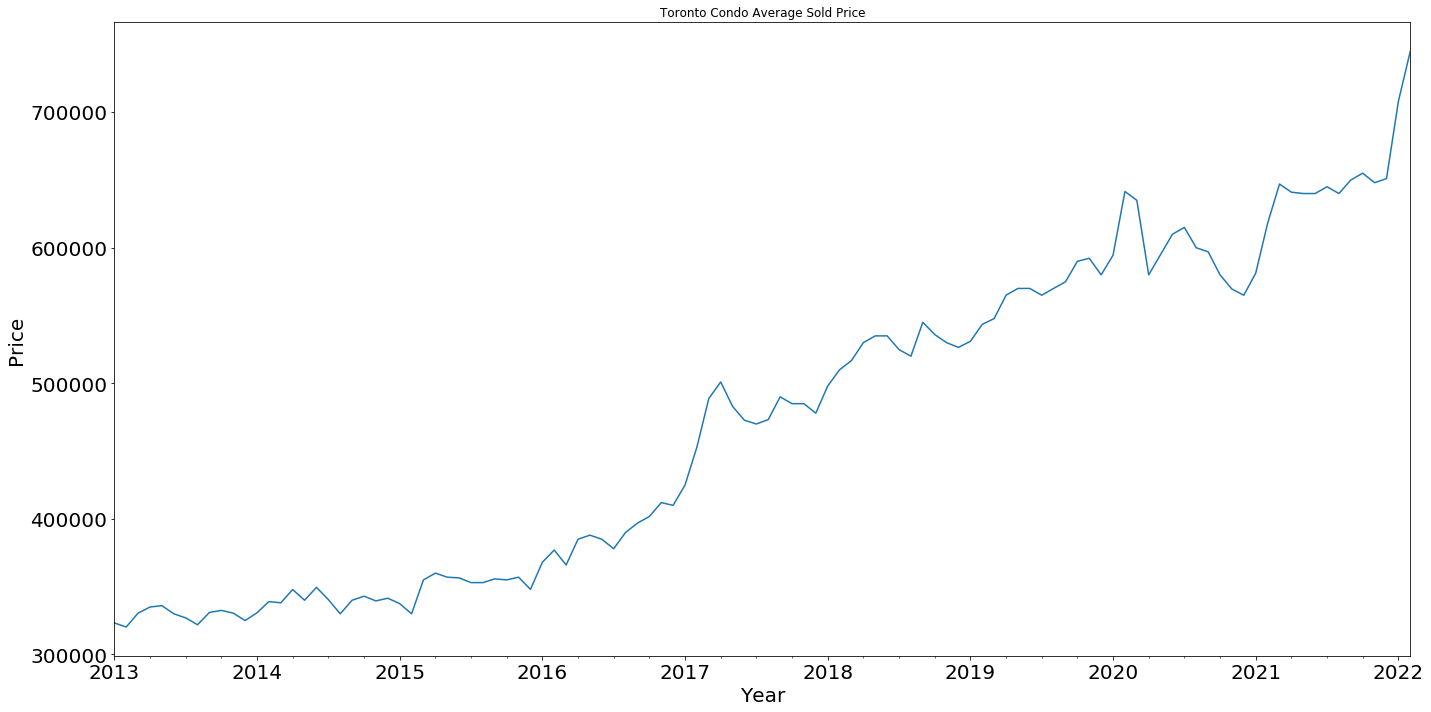

In [42]:

price_ts_condo.plot(title='Toronto Condo Average Sold Price', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20);
plt.tight_layout()
plt.show()

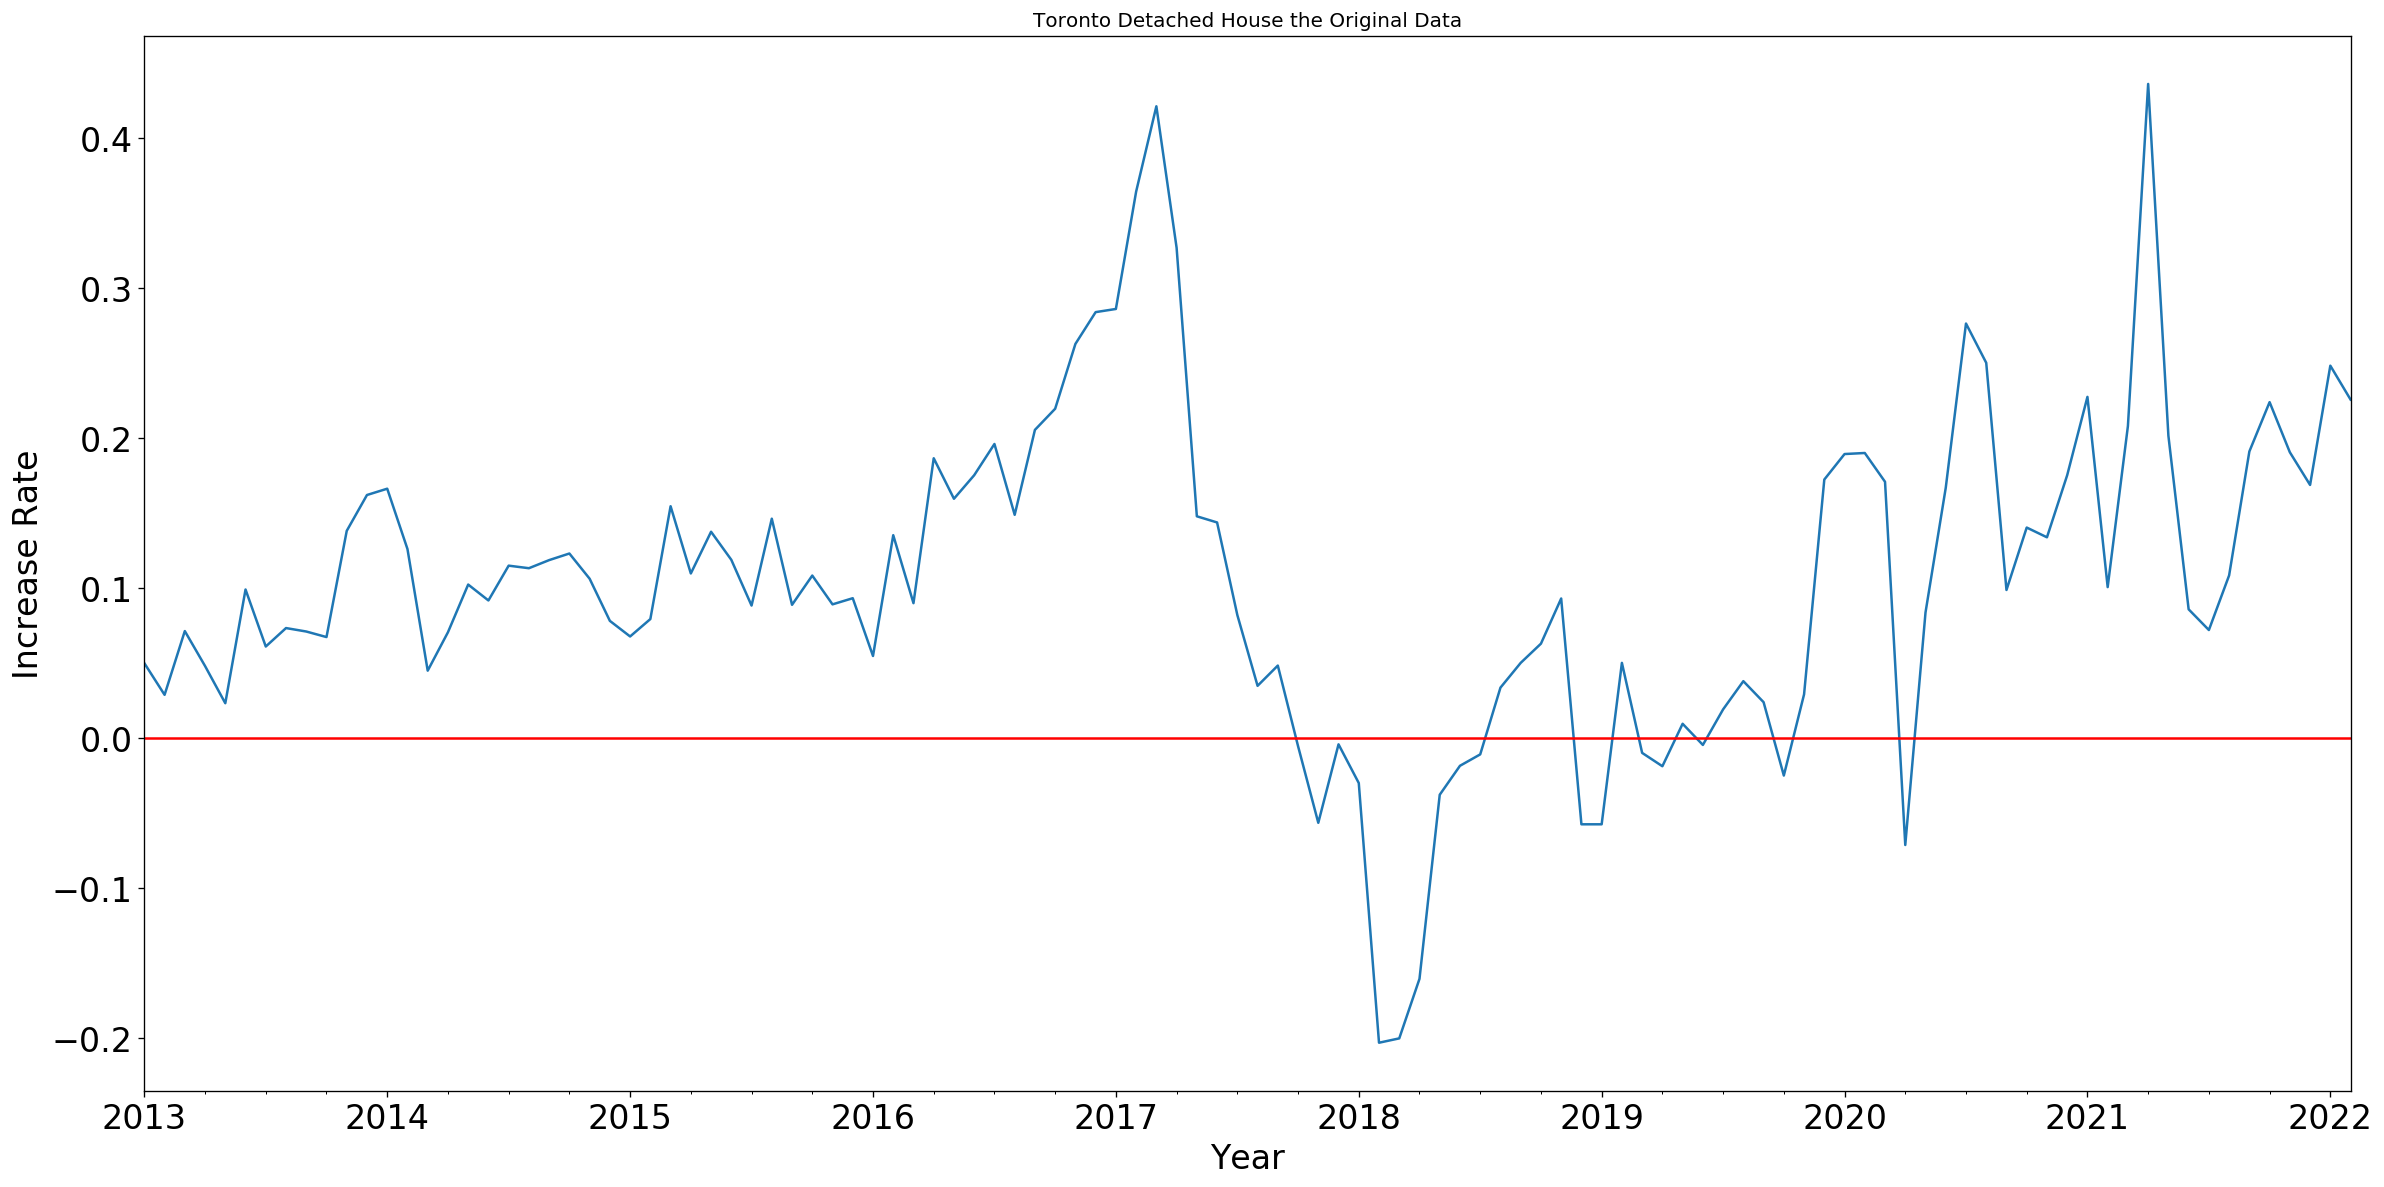

In [305]:
Increase_rate_ts_detached.plot(title='Toronto Detached House the Original Data', figsize=(20,10),fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Increase Rate', fontsize=20);
plt.axhline(y=0, c="red", label="y=0")
plt.tight_layout()
plt.show()

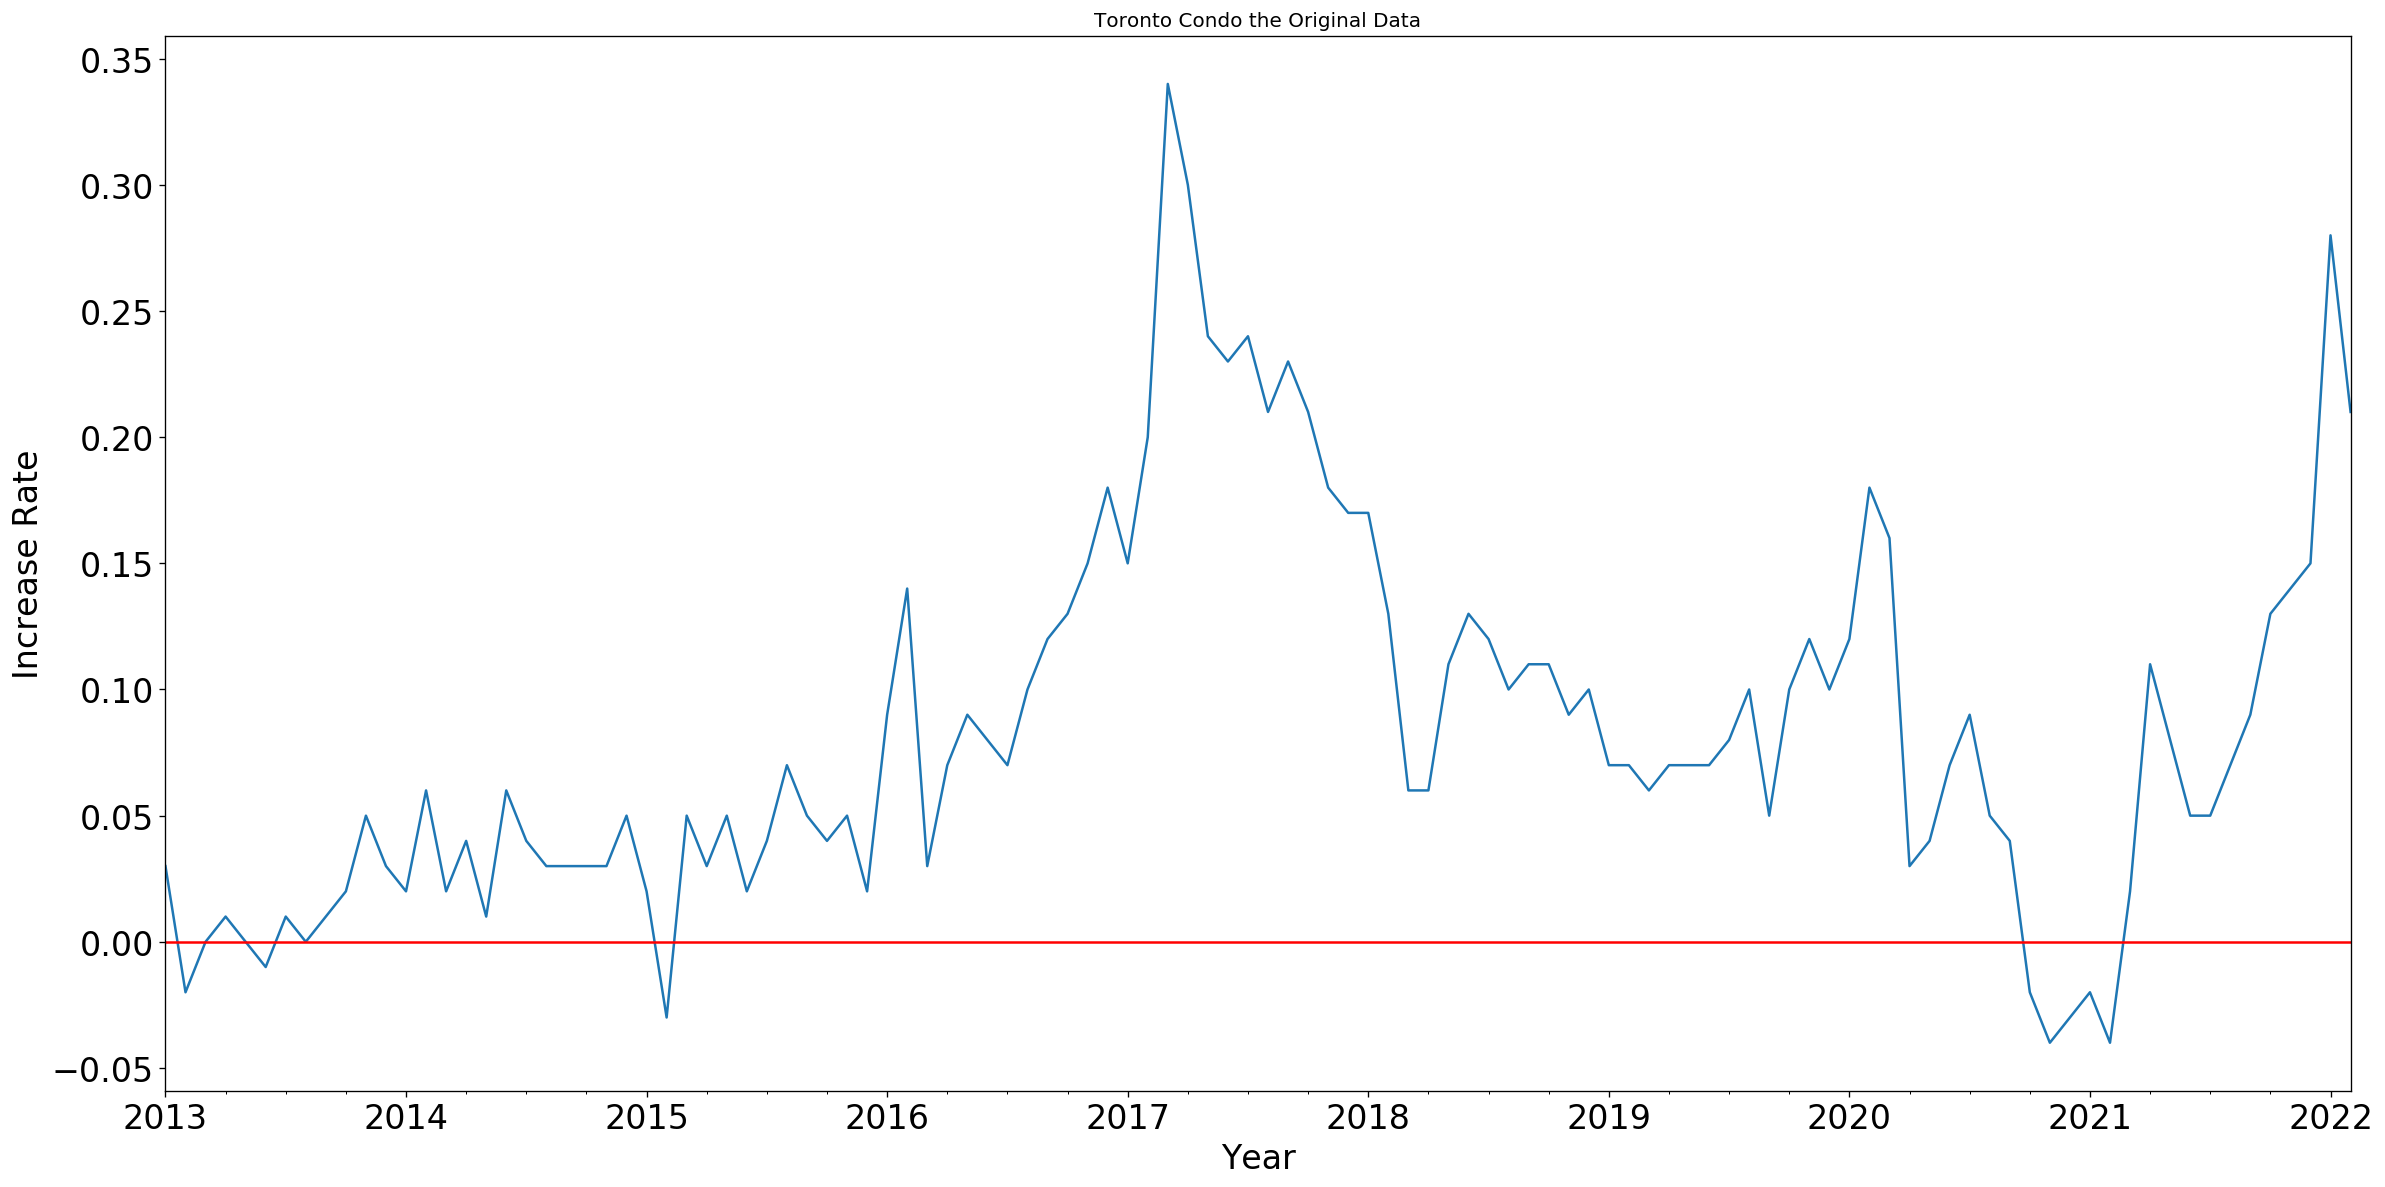

In [306]:
Increase_rate_ts_condo.plot(title='Toronto Condo the Original Data', figsize=(20,10), fontsize=20)  
plt.xlabel('Year', fontsize=20)
plt.ylabel('Increase Rate', fontsize=20);
plt.axhline(y=0, c="red", label="y=0")
plt.tight_layout()
plt.show()

In [296]:
# split data into train and test datasets
train_condo = Increase_rate_ts_condo[0:-6]
test_condo = Increase_rate_ts_condo[-6:]

train_detached = Increase_rate_ts_detached[0:-6]
test_detached = Increase_rate_ts_detached[-6:]

In [86]:
train_condo

2013-01-31    0.03
2013-02-28   -0.02
2013-03-31    0.00
2013-04-30    0.01
2013-05-31    0.00
              ... 
2021-04-30    0.11
2021-05-31    0.08
2021-06-30    0.05
2021-07-31    0.05
2021-08-31    0.07
Freq: M, Length: 104, dtype: float64

In [87]:
train_detached

2013-01-31    0.0498
2013-02-28    0.0287
2013-03-31    0.0712
2013-04-30    0.0479
2013-05-31    0.0231
               ...  
2021-04-30    0.4359
2021-05-31    0.2014
2021-06-30    0.0857
2021-07-31    0.0719
2021-08-31    0.1083
Freq: M, Length: 104, dtype: float64

In [88]:
# Detached house chose the best difference level
# d = 0
from statsmodels.tsa.stattools import adfuller
detached = train_detached.values
detached = detached.reshape(detached.shape[0])
result_detached = adfuller(detached)
print('d = 0  and ADF Statistic: %f' % result_detached[0])
print('d = 0 and p-value: %f' % result_detached[1])

d = 0  and ADF Statistic: -2.026773
d = 0 and p-value: 0.274959


In [89]:
# difference level 1
# d = 1
detached1 = train_detached.diff()
detached1.dropna(inplace=True)

detached1_v = detached1.values
detached1_v = detached1_v.reshape(detached1_v.shape[0])
result_detached1 = adfuller(detached1_v)
print('d = 1 and ADF Statistic Detached: %f' % result_detached1[0])
print('d = 1 and p-value Detached: %f' % result_detached1[1])

d = 1 and ADF Statistic Detached: -4.290306
d = 1 and p-value Detached: 0.000462


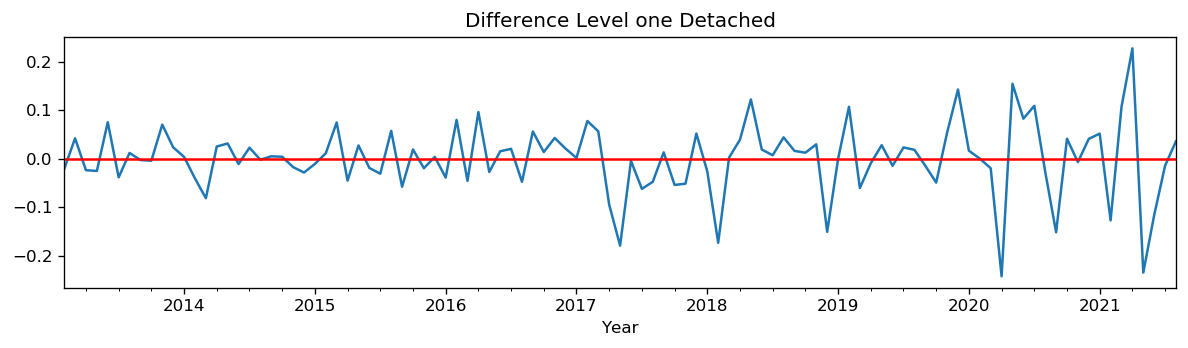

In [259]:
detached1.plot(title='Difference Level one Detached', figsize=(10,3),fontsize=10)  
plt.xlabel('Year', fontsize=10)
plt.axhline(y=0, c="red", label="y=0")
plt.tight_layout()
plt.show()

In [90]:
# Condos chose the best difference level
# d = 0
condo = train_condo.values
condo = condo.reshape(condo.shape[0])
result_condo = adfuller(condo)
print('d = 0 and ADF Statistic Condo: %f' % result_condo[0])
print('d = 0 and p-value Condo: %f' % result_condo[1])

d = 0 and ADF Statistic Condo: -1.515936
d = 0 and p-value Condo: 0.525614


In [91]:
# Condos difference level 1
# d = 1
condo1 = train_condo.diff()
condo1.dropna(inplace=True)

condo1_v = condo1.values
condo1_v = condo1_v.reshape(condo1_v.shape[0])
result_condo1 = adfuller(condo1_v)
print('d = 1 and ADF Statistic Condo: %f' % result_condo1[0])
print('d = 1 and p-value Condo: %f' % result_condo1[1])

d = 1 and ADF Statistic Condo: -3.496199
d = 1 and p-value Condo: 0.008085


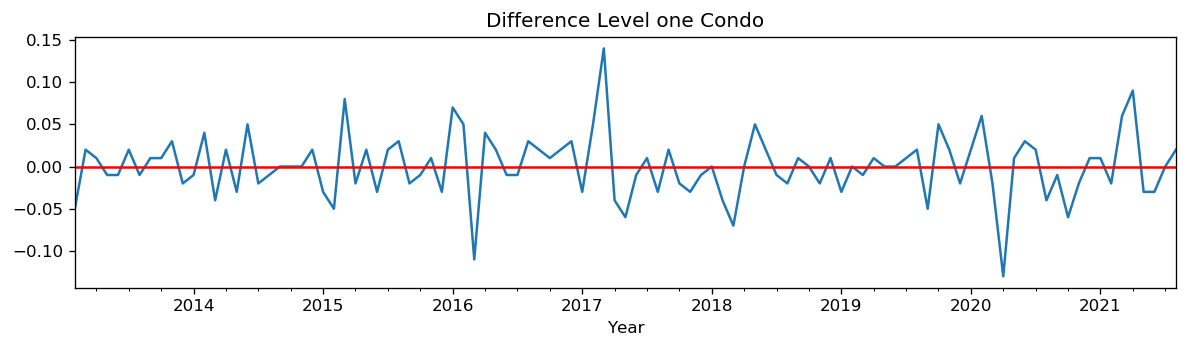

In [260]:
condo1.plot(title='Difference Level one Condo', figsize=(10,3),fontsize=10)  
plt.xlabel('Year', fontsize=10)
plt.axhline(y=0, c="red", label="y=0")
plt.tight_layout()
plt.show()

In [92]:
# Plot the ACF and PACF
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

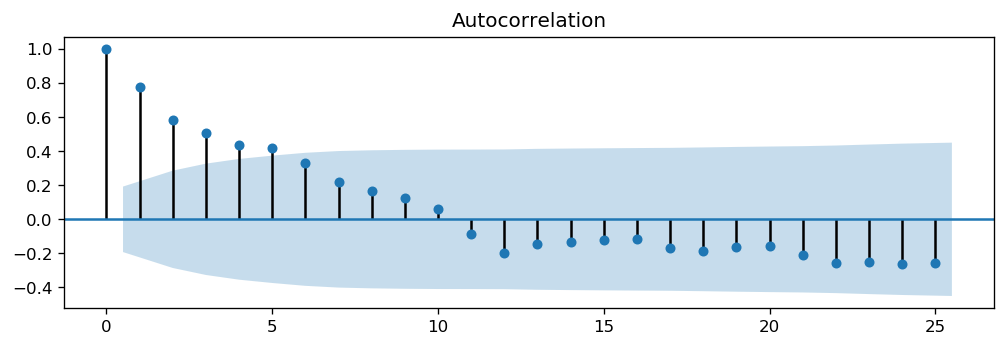

In [93]:
#ACF Detached house
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_detached.dropna(inplace=True)
fig = sm.graphics.tsa.plot_acf(train_detached,lags=25)
plt.show()

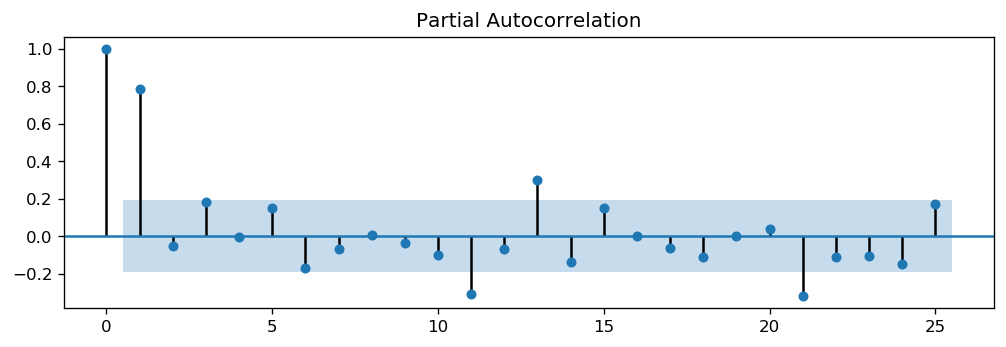

In [94]:
# Detached house PACF
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_detached.dropna(inplace=True)
fig = sm.graphics.tsa.plot_pacf(train_detached,lags=25)
plt.show()

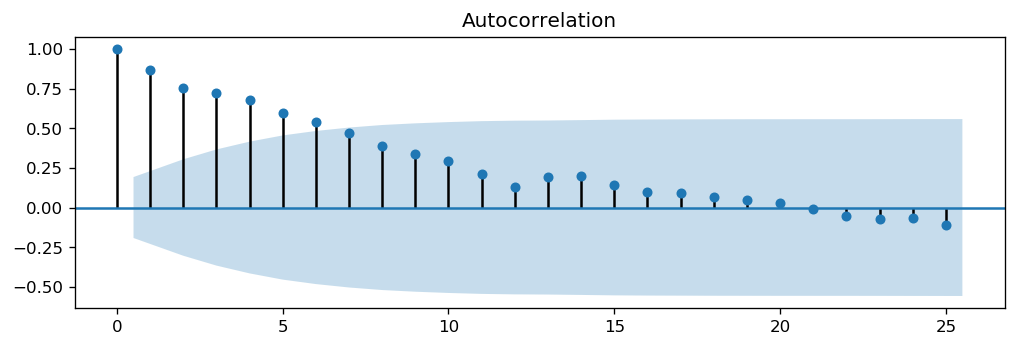

In [95]:
#ACF Condo
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_condo.dropna(inplace=True)
fig = sm.graphics.tsa.plot_acf(train_condo,lags=25)
plt.show()

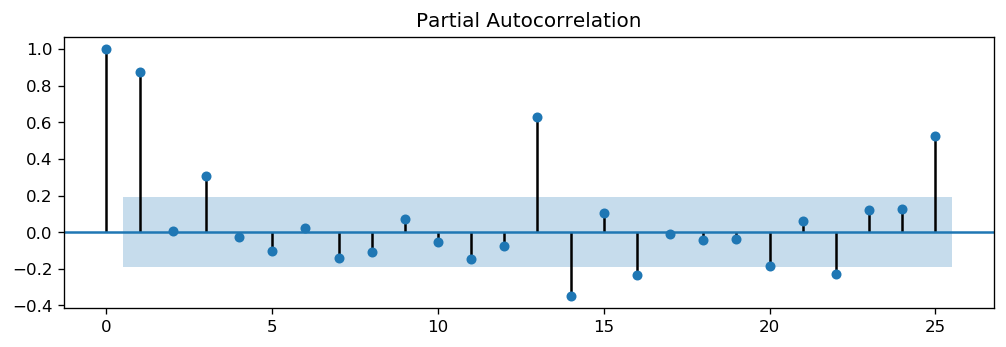

In [96]:
### PACF Condo
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
train_condo.dropna(inplace=True)
fig = sm.graphics.tsa.plot_pacf(train_condo,lags=25)
plt.show()

In [97]:
## Using above the d, p and q to estimate the best model resutle
from statsmodels.tsa.arima_model import ARIMA

In [98]:
### Detached estimate 

# ARIMA Model with p = 1, d = 1, and q = 3
detached_mode113= ARIMA(train_detached.values, order=(1,1,3))
detached_arima_113 = detached_mode113.fit(disp=0)
print(detached_arima_113.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 130.872
Method:                       css-mle   S.D. of innovations              0.067
Date:                Fri, 25 Mar 2022   AIC                           -249.744
Time:                        15:55:37   BIC                           -233.936
Sample:                             1   HQIC                          -243.341
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.004      0.197      0.844      -0.007       0.008
ar.L1.D.y     -0.9298      0.052    -17.841      0.000      -1.032      -0.828
ma.L1.D.y      0.8511      0.115      7.390      0.0

In [99]:
# ARIMA Model with p = 1, d = 1, and q = 4
detached_mode114= ARIMA(train_detached.values, order=(1,1,4))
detached_arima_114 = detached_mode114.fit(disp=0)
print(detached_arima_114.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 130.621
Method:                       css-mle   S.D. of innovations              0.068
Date:                Fri, 25 Mar 2022   AIC                           -247.242
Time:                        15:55:44   BIC                           -228.799
Sample:                             1   HQIC                          -239.772
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.003      0.279      0.780      -0.006       0.008
ar.L1.D.y     -0.4068      0.448     -0.908      0.364      -1.285       0.472
ma.L1.D.y      0.3164      0.437      0.724      0.4

In [100]:
# ARIMA Model with p = 1, d = 1, and q = 5
detached_mode115= ARIMA(train_detached.values, order=(1,1,5))
detached_arima_115 = detached_mode115.fit(disp=0)
print(detached_arima_115.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 131.368
Method:                       css-mle   S.D. of innovations              0.067
Date:                Fri, 25 Mar 2022   AIC                           -246.736
Time:                        15:55:47   BIC                           -225.658
Sample:                             1   HQIC                          -238.198
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.179      0.858      -0.009       0.011
ar.L1.D.y      0.2257      0.329      0.687      0.492      -0.419       0.870
ma.L1.D.y     -0.3313      0.325     -1.018      0.3

In [101]:
# ARIMA Model with p = 1, d = 1, and q = 6
detached_mode116= ARIMA(train_detached.values, order=(1,1,6))
detached_arima_116 = detached_mode116.fit(disp=0)
print(detached_arima_116.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 6)   Log Likelihood                 135.562
Method:                       css-mle   S.D. of innovations              0.063
Date:                Fri, 25 Mar 2022   AIC                           -253.123
Time:                        15:56:05   BIC                           -229.411
Sample:                             1   HQIC                          -243.519
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.009      0.012      0.990      -0.018       0.018
ar.L1.D.y     -0.0456      0.185     -0.246      0.806      -0.409       0.318
ma.L1.D.y     -0.0949      0.163     -0.582      0.5

In [102]:
# ARIMA Model with p = 2, d = 1, and q = 3
detached_mode213= ARIMA(train_detached.values, order=(2,1,3))
detached_arima_213 = detached_mode213.fit(disp=0)
print(detached_arima_213.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 131.800
Method:                       css-mle   S.D. of innovations              0.067
Date:                Fri, 25 Mar 2022   AIC                           -249.601
Time:                        15:56:18   BIC                           -231.157
Sample:                             1   HQIC                          -242.130
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.226      0.821      -0.002       0.002
ar.L1.D.y      0.5220      0.521      1.002      0.316      -0.499       1.543
ar.L2.D.y      0.2980      0.392      0.760      0.4

In [103]:
# ARIMA Model with p = 2, d = 1, and q = 4
detached_mode214= ARIMA(train_detached.values, order=(2,1,4))
detached_arima_214 = detached_mode214.fit(disp=0)
print(detached_arima_214.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 135.129
Method:                       css-mle   S.D. of innovations              0.064
Date:                Fri, 25 Mar 2022   AIC                           -254.258
Time:                        15:56:28   BIC                           -233.180
Sample:                             1   HQIC                          -245.721
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.003      0.345      0.730      -0.006       0.008
ar.L1.D.y     -0.2647      0.102     -2.606      0.009      -0.464      -0.066
ar.L2.D.y     -0.6949      0.094     -7.387      0.0

In [104]:
# ARIMA Model with p = 2, d = 1, and q = 5
detached_mode215= ARIMA(train_detached.values, order=(2,1,5))
detached_arima_215 = detached_mode215.fit(disp=0)
print(detached_arima_215.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 137.759
Method:                       css-mle   S.D. of innovations              0.062
Date:                Fri, 25 Mar 2022   AIC                           -257.518
Time:                        15:56:34   BIC                           -233.806
Sample:                             1   HQIC                          -247.914
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.004      0.263      0.793      -0.007       0.010
ar.L1.D.y      0.2671      0.127      2.099      0.036       0.018       0.516
ar.L2.D.y     -0.6992      0.101     -6.889      0.0

In [106]:
# ARIMA Model with p = 3, d = 1, and q = 1
detached_mode311= ARIMA(train_detached.values, order=(3,1,1))
detached_arima_311 = detached_mode311.fit(disp=0)
print(detached_arima_311.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 129.300
Method:                       css-mle   S.D. of innovations              0.069
Date:                Fri, 25 Mar 2022   AIC                           -246.600
Time:                        15:57:43   BIC                           -230.791
Sample:                             1   HQIC                          -240.197
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.004      0.197      0.844      -0.007       0.008
ar.L1.D.y      0.4930      0.729      0.676      0.499      -0.936       1.922
ar.L2.D.y     -0.2136      0.126     -1.695      0.0

In [108]:
# ARIMA Model with p = 3, d = 1, and q = 2
detached_mode312= ARIMA(train_detached.values, order=(3,1,2))
detached_arima_312 = detached_mode312.fit(disp=0)
print(detached_arima_312.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 131.506
Method:                       css-mle   S.D. of innovations              0.067
Date:                Fri, 25 Mar 2022   AIC                           -249.013
Time:                        15:58:15   BIC                           -230.569
Sample:                             1   HQIC                          -241.542
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.209      0.834      -0.002       0.002
ar.L1.D.y      0.1064      0.362      0.294      0.768      -0.602       0.815
ar.L2.D.y      0.4369      0.354      1.234      0.2

In [109]:
# ARIMA Model with p = 3, d = 1, and q = 3
detached_mode313= ARIMA(train_detached.values, order=(3,1,3))
detached_arima_313 = detached_mode313.fit(disp=0)
print(detached_arima_313.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 134.099
Method:                       css-mle   S.D. of innovations              0.064
Date:                Fri, 25 Mar 2022   AIC                           -252.198
Time:                        15:58:38   BIC                           -231.120
Sample:                             1   HQIC                          -243.661
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.006      0.021      0.983      -0.011       0.011
ar.L1.D.y      0.6532      0.216      3.026      0.002       0.230       1.076
ar.L2.D.y      0.3148      0.316      0.996      0.3

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [105]:
# ARIMA Model with p = 3, d = 1, and q = 4
detached_mode314= ARIMA(train_detached.values, order=(3,1,4))
detached_arima_314 = detached_mode314.fit(disp=0)
print(detached_arima_314.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 137.364
Method:                       css-mle   S.D. of innovations              0.062
Date:                Fri, 25 Mar 2022   AIC                           -256.727
Time:                        15:56:41   BIC                           -233.015
Sample:                             1   HQIC                          -247.123
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.004      0.323      0.747      -0.006       0.008
ar.L1.D.y     -0.2998      0.200     -1.497      0.134      -0.692       0.093
ar.L2.D.y     -0.6470      0.094     -6.871      0.0

In [111]:
# ARIMA Model with p = 3, d = 1, and q = 5
detached_mode315= ARIMA(train_detached.values, order=(3,1,5))
detached_arima_315 = detached_mode315.fit(disp=0)
print(detached_arima_315.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 5)   Log Likelihood                 137.911
Method:                       css-mle   S.D. of innovations              0.062
Date:                Fri, 25 Mar 2022   AIC                           -255.821
Time:                        15:59:19   BIC                           -229.474
Sample:                             1   HQIC                          -245.150
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.004      0.276      0.782      -0.007       0.009
ar.L1.D.y      0.0271      0.389      0.070      0.944      -0.735       0.790
ar.L2.D.y     -0.6761      0.100     -6.730      0.0

In [66]:
# ARIMA Model with p = 4, d = 1, and q = 4
detached_mode414= ARIMA(train_detached.values, order=(4,1,4))
detached_arima_414 = detached_mode414.fit(disp=0)
print(detached_arima_414.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 137.437
Method:                       css-mle   S.D. of innovations              0.058
Date:                Fri, 25 Mar 2022   AIC                           -254.874
Time:                        15:41:06   BIC                           -228.923
Sample:                             1   HQIC                          -244.374
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.006      0.586      0.558      -0.009       0.016
ar.L1.D.y     -0.2928      0.075     -3.912      0.000      -0.439      -0.146
ar.L2.D.y     -1.6101      0.078    -20.671      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


##### ARIMA Model with p = 2, d = 1, and q = 5 has the lowest AIC and BIC values
##### AIC =  -257.518
##### BIC = -233.806                   

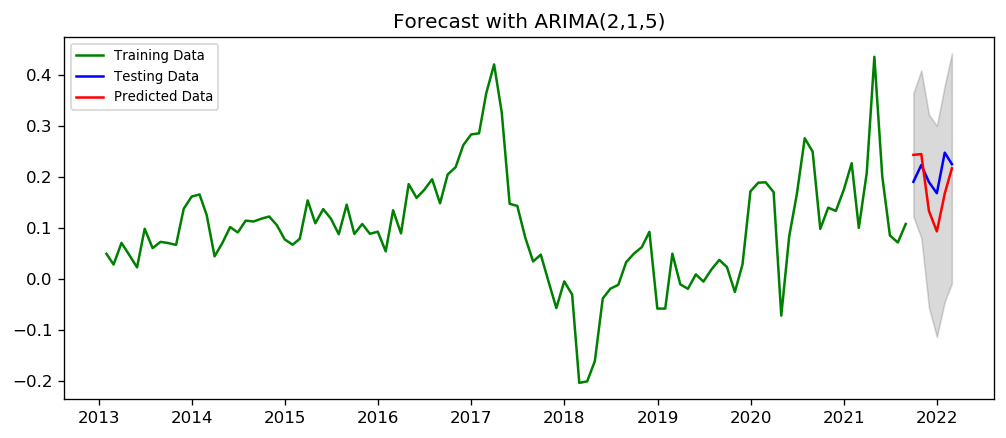

In [112]:
# Forecast for the 6 test dataset
fc, se, conf = detached_arima_215.forecast(6, alpha=0.05)

fc_series = Series(fc, index=test_detached.index)
lower_series = Series(conf[:, 0], index=test_detached.index)
upper_series = Series(conf[:, 1], index=test_detached.index)

plt.figure(figsize=(10,4))
plt.plot(train_detached, label='Training Data', color='g')
plt.plot(test_detached, label='Testing Data',color='b')
plt.plot(fc_series, label='Predicted Data', color='r')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast with ARIMA(2,1,5)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [113]:
##################################
##################################

In [114]:
### Condo estimate 

# ARIMA Model with p = 1, d = 1, and q = 1
condo_mode111= ARIMA(train_condo.values, order=(1,1,1))
condo_arima_111 = condo_mode111.fit(disp=0)
print(condo_arima_111.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 195.210
Method:                       css-mle   S.D. of innovations              0.036
Date:                Fri, 25 Mar 2022   AIC                           -382.420
Time:                        16:02:27   BIC                           -371.881
Sample:                             1   HQIC                          -378.152
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.202      0.840      -0.004       0.005
ar.L1.D.y      0.4648      0.288      1.614      0.107      -0.100       1.029
ma.L1.D.y     -0.6743      0.240     -2.804      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [115]:
# ARIMA Model with p = 1, d = 1, and q = 2
condo_mode112= ARIMA(train_condo.values, order=(1,1,2))
condo_arima_112 = condo_mode112.fit(disp=0)
print(condo_arima_112.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 197.618
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -385.236
Time:                        16:02:31   BIC                           -372.062
Sample:                             1   HQIC                          -379.900
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.204      0.839      -0.004       0.005
ar.L1.D.y     -0.0927      0.279     -0.332      0.740      -0.640       0.455
ma.L1.D.y     -0.0303      0.261     -0.116      0.9

In [116]:
# ARIMA Model with p = 1, d = 1, and q = 3
condo_mode113= ARIMA(train_condo.values, order=(1,1,3))
condo_arima_113 = condo_mode113.fit(disp=0)
print(condo_arima_113.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 198.028
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -384.056
Time:                        16:02:41   BIC                           -368.248
Sample:                             1   HQIC                          -377.653
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.003      0.188      0.851      -0.005       0.006
ar.L1.D.y      0.4752      0.374      1.270      0.204      -0.258       1.208
ma.L1.D.y     -0.6226      0.372     -1.672      0.0

In [117]:
# ARIMA Model with p = 1, d = 1, and q = 4
condo_mode114= ARIMA(train_condo.values, order=(1,1,4))
condo_arima_114 = condo_mode114.fit(disp=0)
print(condo_arima_114.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 199.949
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -385.898
Time:                        16:02:42   BIC                           -367.455
Sample:                             1   HQIC                          -378.428
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.003      0.176      0.860      -0.005       0.006
ar.L1.D.y     -0.6171      0.163     -3.780      0.000      -0.937      -0.297
ma.L1.D.y      0.5270      0.182      2.893      0.0

In [118]:
# ARIMA Model with p = 1, d = 1, and q = 5
condo_mode115= ARIMA(train_condo.values, order=(1,1,5))
condo_arima_115 = condo_mode115.fit(disp=0)
print(condo_arima_115.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [119]:
# ARIMA Model with p = 2, d = 1, and q = 1
condo_mode211= ARIMA(train_condo.values, order=(2,1,1))
condo_arima_211 = condo_mode211.fit(disp=0)
print(condo_arima_211.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 198.700
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -387.399
Time:                        16:02:46   BIC                           -374.225
Sample:                             1   HQIC                          -382.063
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.187      0.852      -0.004       0.005
ar.L1.D.y     -0.0793      0.249     -0.318      0.750      -0.568       0.409
ar.L2.D.y     -0.3242      0.096     -3.372      0.0

In [120]:
# ARIMA Model with p = 2, d = 1, and q = 2
condo_mode212= ARIMA(train_condo.values, order=(2,1,2))
condo_arima_212 = condo_mode212.fit(disp=0)
print(condo_arima_212.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 198.811
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -385.622
Time:                        16:02:49   BIC                           -369.813
Sample:                             1   HQIC                          -379.219
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.170      0.865      -0.004       0.005
ar.L1.D.y     -0.0795      0.280     -0.284      0.777      -0.629       0.470
ar.L2.D.y     -0.4236      0.217     -1.955      0.0

In [127]:
# ARIMA Model with p = 2, d = 1, and q = 3
condo_mode213= ARIMA(train_condo.values, order=(2,1,3))
condo_arima_213 = condo_mode213.fit(disp=0)
print(condo_arima_213.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 203.766
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Mar 2022   AIC                           -393.531
Time:                        16:03:42   BIC                           -375.088
Sample:                             1   HQIC                          -386.061
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.155      0.877      -0.004       0.005
ar.L1.D.y     -0.6600      0.062    -10.592      0.000      -0.782      -0.538
ar.L2.D.y     -0.8769      0.060    -14.710      0.0

In [128]:
# ARIMA Model with p = 2, d = 1, and q = 4
condo_mode214= ARIMA(train_condo.values, order=(2,1,4))
condo_arima_214 = condo_mode214.fit(disp=0)
print(condo_arima_214.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 201.683
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Mar 2022   AIC                           -387.366
Time:                        16:03:54   BIC                           -366.288
Sample:                             1   HQIC                          -378.829
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.196      0.844      -0.004       0.005
ar.L1.D.y     -1.5414      0.145    -10.648      0.000      -1.825      -1.258
ar.L2.D.y     -0.7676      0.107     -7.149      0.0

In [129]:
# ARIMA Model with p = 3, d = 1, and q = 1
condo_mode311= ARIMA(train_condo.values, order=(3,1,1))
condo_arima_311 = condo_mode311.fit(disp=0)
print(condo_arima_311.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 198.887
Method:                       css-mle   S.D. of innovations              0.035
Date:                Fri, 25 Mar 2022   AIC                           -385.773
Time:                        16:03:59   BIC                           -369.965
Sample:                             1   HQIC                          -379.370
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.189      0.850      -0.004       0.005
ar.L1.D.y     -0.7112      0.388     -1.832      0.067      -1.472       0.050
ar.L2.D.y     -0.4020      0.120     -3.360      0.0

In [130]:
# ARIMA Model with p = 3, d = 1, and q = 2
condo_mode312= ARIMA(train_condo.values, order=(3,1,2))
condo_arima_312 = condo_mode312.fit(disp=0)
print(condo_arima_312.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 202.677
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Mar 2022   AIC                           -391.353
Time:                        16:04:01   BIC                           -372.910
Sample:                             1   HQIC                          -383.883
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.003      0.113      0.910      -0.005       0.006
ar.L1.D.y     -0.9259      0.103     -8.955      0.000      -1.129      -0.723
ar.L2.D.y     -1.0700      0.078    -13.706      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [131]:
# ARIMA Model with p = 3, d = 1, and q = 3
condo_mode313= ARIMA(train_condo.values, order=(3,1,3))
condo_arima_313 = condo_mode313.fit(disp=0)
print(condo_arima_313.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 203.907
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Mar 2022   AIC                           -391.814
Time:                        16:04:06   BIC                           -370.737
Sample:                             1   HQIC                          -383.277
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.167      0.868      -0.004       0.005
ar.L1.D.y     -0.4918      0.286     -1.718      0.086      -1.053       0.069
ar.L2.D.y     -0.7549      0.205     -3.677      0.0

D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [132]:
# ARIMA Model with p = 3, d = 1, and q = 4
condo_mode314= ARIMA(train_condo.values, order=(3,1,4))
condo_arima_314 = condo_mode314.fit(disp=0)
print(condo_arima_314.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  103
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 202.084
Method:                       css-mle   S.D. of innovations              0.033
Date:                Fri, 25 Mar 2022   AIC                           -386.168
Time:                        16:04:12   BIC                           -362.456
Sample:                             1   HQIC                          -376.564
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.504      0.615      -0.001       0.002
ar.L1.D.y     -0.4145      0.170     -2.438      0.015      -0.748      -0.081
ar.L2.D.y      0.6557      0.085      7.697      0.0

##### ARIMA Model with p = 2, d = 1, and q = 3 has the lowest AIC and BIC values
##### AIC = -393.531
##### BIC = -375.088             

In [133]:
###########

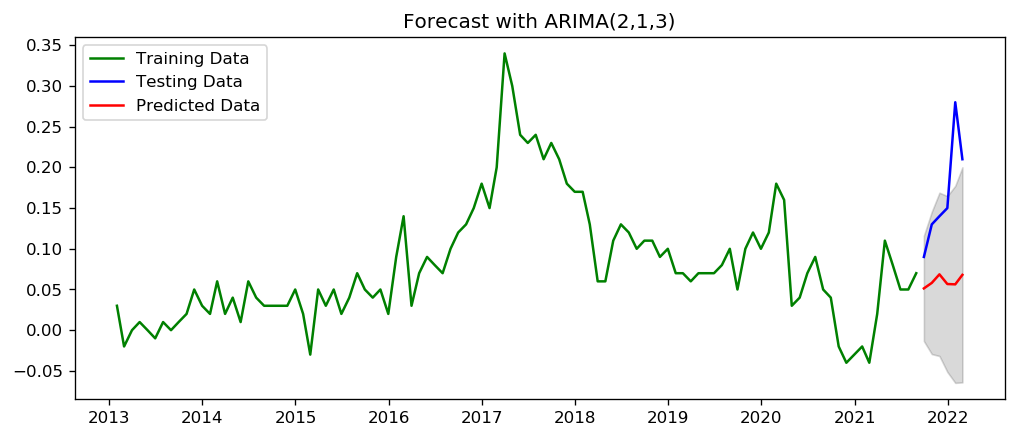

In [134]:
# Forecast for the 10 test Condo data
fc_condo, se_condo, conf_condo = condo_arima_213.forecast(6, alpha=0.05)

fc_series_condo = Series(fc_condo, index=test_condo.index)
lower_series = Series(conf_condo[:, 0], index=test_condo.index)
upper_series = Series(conf_condo[:, 1], index=test_condo.index)

plt.figure(figsize=(10,4))
plt.plot(train_condo, label='Training Data', color='g')
plt.plot(test_condo, label='Testing Data',color='b')
plt.plot(fc_series_condo, label='Predicted Data', color='r')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast with ARIMA(2,1,3)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [136]:
#################################
#################################
#################################

#### RSE (Relative Squire Error)
#### MSE ( Mean Squared Error)
#### MAE ( Mean Absolute Error)
#### R^2

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [179]:
#################################
###  DETACHED HOUSE  ###
#################################

Y_detached = []
Y_detached_Pred = []

for index, v in enumerate(test_detached):
    Y_detached.append(v)
for index, v in enumerate(fc_series):
    Y_detached_Pred.append(v)

In [180]:
Y_detached

[0.1909, 0.2238, 0.1904, 0.1686, 0.2481, 0.2255]

In [181]:
Y_detached_Pred

[0.24364295391090268,
 0.245183059348013,
 0.13373196532781279,
 0.0936669605218496,
 0.1678528525316837,
 0.2173192918248131]

In [190]:
mse = mean_squared_error(Y_detached,Y_detached_Pred)
print('MSE = ', round(mse,3))

MSE =  0.003


In [199]:
from math import sqrt
rmse = sqrt(mse)
print('RMSE = ', round(rmse,3))


RMSE =  0.056


In [200]:
mae=mean_absolute_error(Y_detached,Y_detached_Pred)
print('MAE = ', round(mae,3))

MAE =  0.049


In [164]:
#################################
###  CONDOS  ###
#################################

Y_condos = []
Y_condos_Pred = []

for index, v in enumerate(test_condo):
    Y_condos.append(v)
for index, v in enumerate(fc_series_condo):
    Y_condos_Pred.append(v)

In [165]:
Y_condos

[0.09, 0.13, 0.14, 0.15, 0.28, 0.21]

In [201]:
Y_condos_Pred

[0.05133739017694376,
 0.058102093397716936,
 0.06859109170501657,
 0.056707286793672596,
 0.05632342499052897,
 0.0679682418418035]

In [202]:
mse_condo = mean_squared_error(Y_condos,Y_condos_Pred)
print('MSE Condo = ', round(mse_condo,3))

MSE Condo =  0.015


In [203]:
rmse_condo = sqrt(mse_condo)
print('RMSE Condo = ', round(rmse_condo,3))

RMSE Condo =  0.123


In [204]:
mae_condo=mean_absolute_error(Y_condos,Y_condos_Pred)
print('MAE Condo = ', round(mae_condo,3))

MAE Condo =  0.107


In [205]:
###########################################
###########################################
###########################################

In [ ]:
#################################
###  DETACHED HOUSE  ###
#################################

In [307]:
Increase_rate_ts_detached

2013-01-31    0.0498
2013-02-28    0.0287
2013-03-31    0.0712
2013-04-30    0.0479
2013-05-31    0.0231
               ...  
2021-10-31    0.2238
2021-11-30    0.1904
2021-12-31    0.1686
2022-01-31    0.2481
2022-02-28    0.2255
Freq: M, Length: 110, dtype: float64

In [207]:
Increase_rate_ts_condo

2013-01-31    0.03
2013-02-28   -0.02
2013-03-31    0.00
2013-04-30    0.01
2013-05-31    0.00
              ... 
2021-10-31    0.13
2021-11-30    0.14
2021-12-31    0.15
2022-01-31    0.28
2022-02-28    0.21
Freq: M, Length: 110, dtype: float64

In [308]:
# ARIMA Model with p = 2, d = 1, and q = 5 Detached house
detached_mode215_all= ARIMA(Increase_rate_ts_detached.values, order=(2,1,5))
detached_mode215_all = detached_mode215_all.fit(disp=0)
print(detached_mode215_all.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  109
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 147.858
Method:                       css-mle   S.D. of innovations              0.061
Date:                Mon, 28 Mar 2022   AIC                           -277.716
Time:                        11:33:54   BIC                           -253.494
Sample:                             1   HQIC                          -267.894
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.004      0.348      0.728      -0.006       0.009
ar.L1.D.y      0.1950      0.106      1.836      0.066      -0.013       0.403
ar.L2.D.y     -0.7098      0.087     -8.152      0.0

In [273]:
# Forecast for next 6 months Detached price

fc_all, se_all, conf_all = detached_mode215_all.forecast(6, alpha=0.05)
index_all =  date_range('2022-03-01',periods=6,freq='M')
fc_series_all = Series(fc_all, index=index_all)

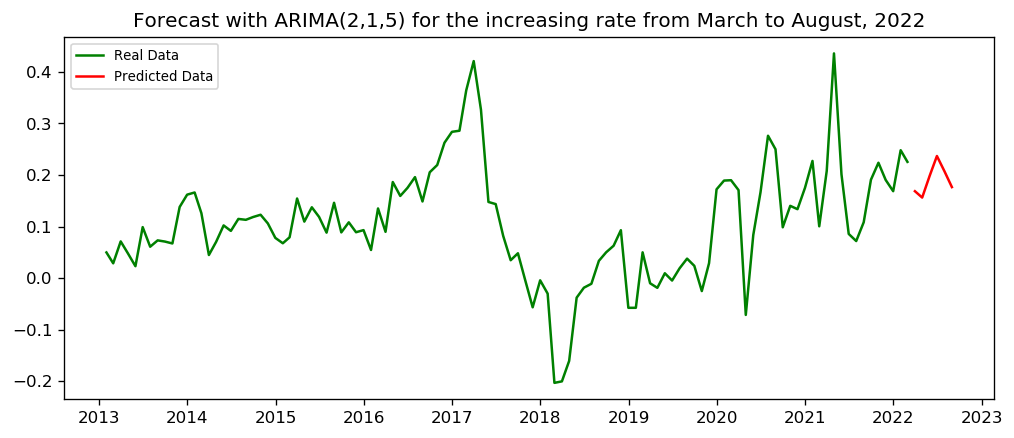

In [274]:

plt.figure(figsize=(10,4))
plt.plot(Increase_rate_ts_detached, label='Real Data', color='g')
plt.plot(fc_series_all, label='Predicted Data', color='r')
plt.title('Forecast with ARIMA(2,1,5) for the increasing rate from March to August, 2022' )
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [275]:
###  Change the increasing rate to price

#  Increasing rate =  (this year's  price - last year's price)/ last year's price
#  This year's price = last year's price + last year's price *  Increasing_rate
forcast_price_detached = []
for i, v in  enumerate(fc_series_all.index):
    this_year_price =  price_ts_detached[v-12] + (price_ts_detached[v-12] * fc_series_all[v])
    forcast_price_detached.append(this_year_price)
    print(v)
    print(this_year_price)
    print(price_ts_detached[v-12] )

2022-03-31 00:00:00
1636029.1614093431
1400000
2022-04-30 00:00:00
1618762.5686636223
1400000
2022-05-31 00:00:00
1669381.4524006667
1393000
2022-06-30 00:00:00
1645037.6213574396
1330000
2022-07-31 00:00:00
1593892.5285238482
1320000
2022-08-31 00:00:00
1564815.882475451
1330000


D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  import sys
D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  # This is added back by InteractiveShellApp.init_path()


In [276]:
forcast_price_detached_ts = Series(forcast_price_detached, index=index_all)
forcast_price_detached_ts

2022-03-31    1.636029e+06
2022-04-30    1.618763e+06
2022-05-31    1.669381e+06
2022-06-30    1.645038e+06
2022-07-31    1.593893e+06
2022-08-31    1.564816e+06
Freq: M, dtype: float64

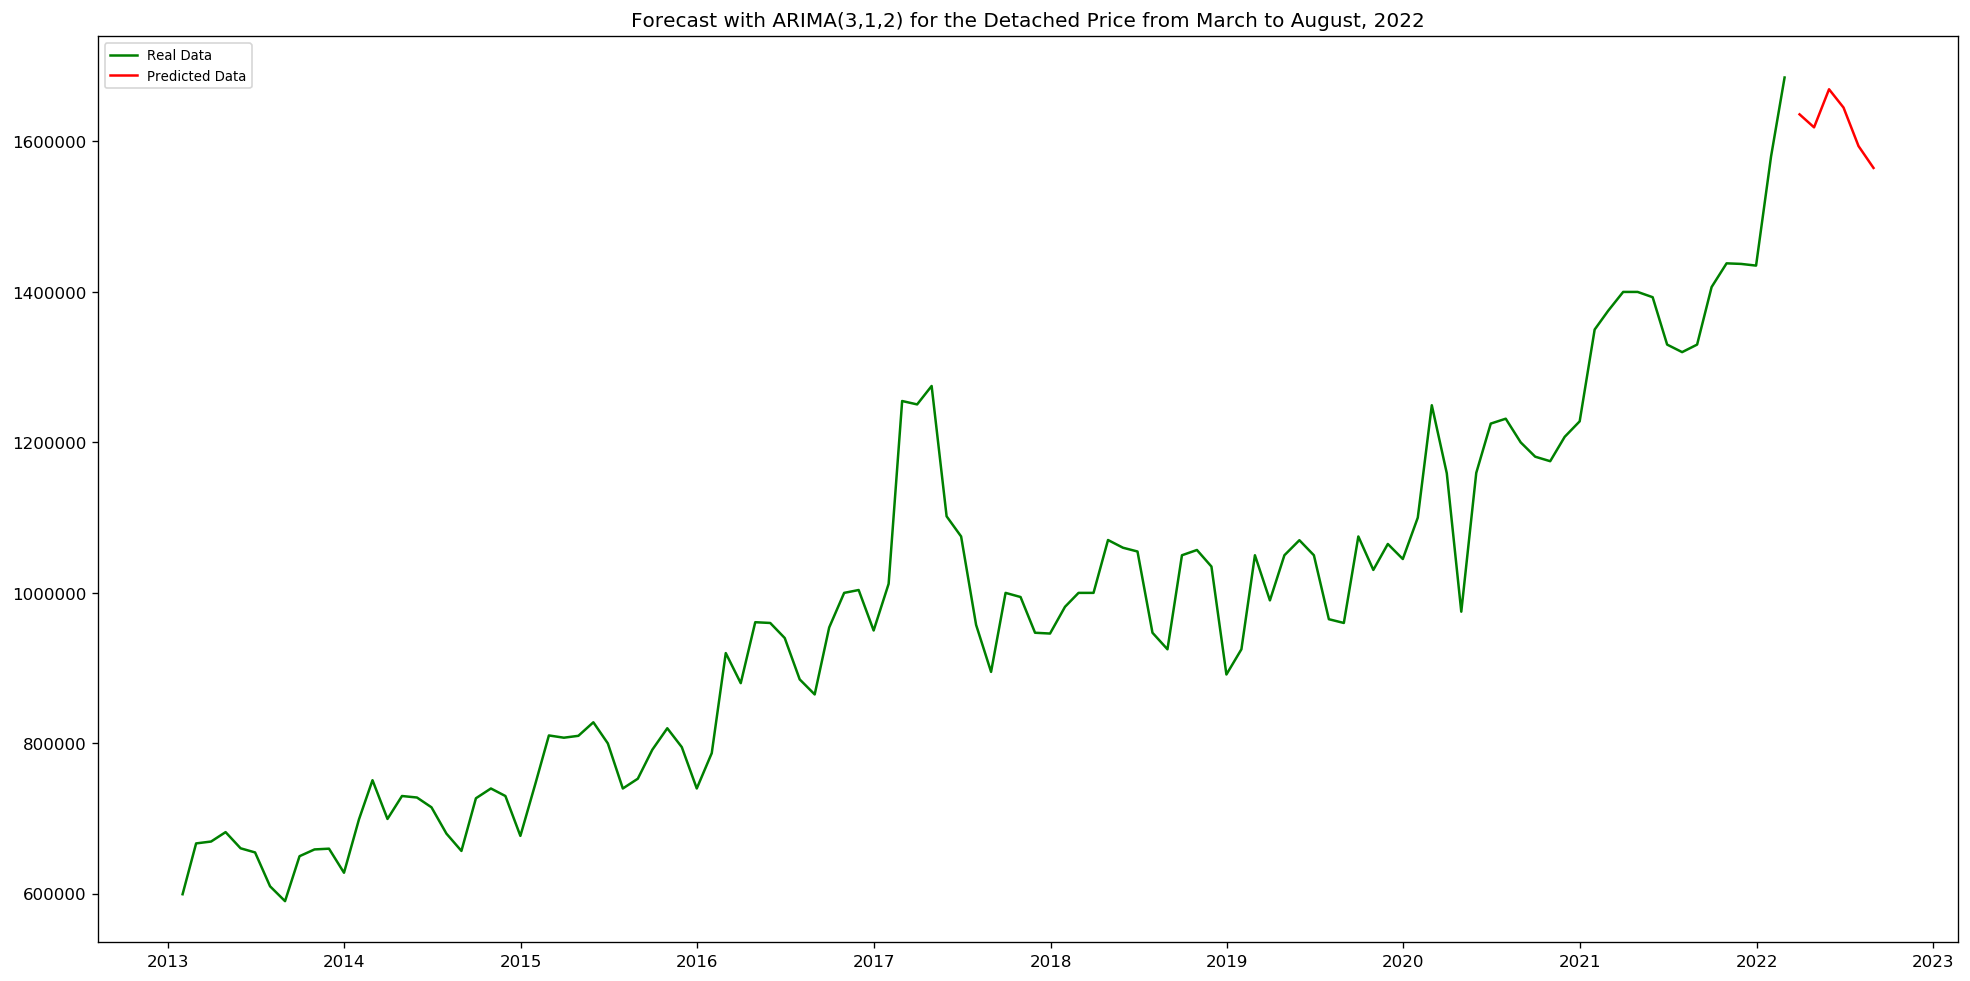

In [277]:

plt.figure(figsize=(20,10))
plt.plot(price_ts_detached, label='Real Data', color='g')
plt.plot(forcast_price_detached_ts, label='Predicted Data', color='r')
plt.title('Forecast with ARIMA(3,1,2) for the Detached Price from March to August, 2022' )
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [284]:
detached_2021_2022 = price_ts_detached[-14:]
detached_2021_2022

2021-01-31    1350000
2021-02-28    1375000
2021-03-31    1400000
2021-04-30    1400000
2021-05-31    1393000
2021-06-30    1330000
2021-07-31    1320000
2021-08-31    1330000
2021-09-30    1406500
2021-10-31    1438000
2021-11-30    1437250
2021-12-31    1435000
2022-01-31    1580000
2022-02-28    1685000
Freq: M, dtype: int64

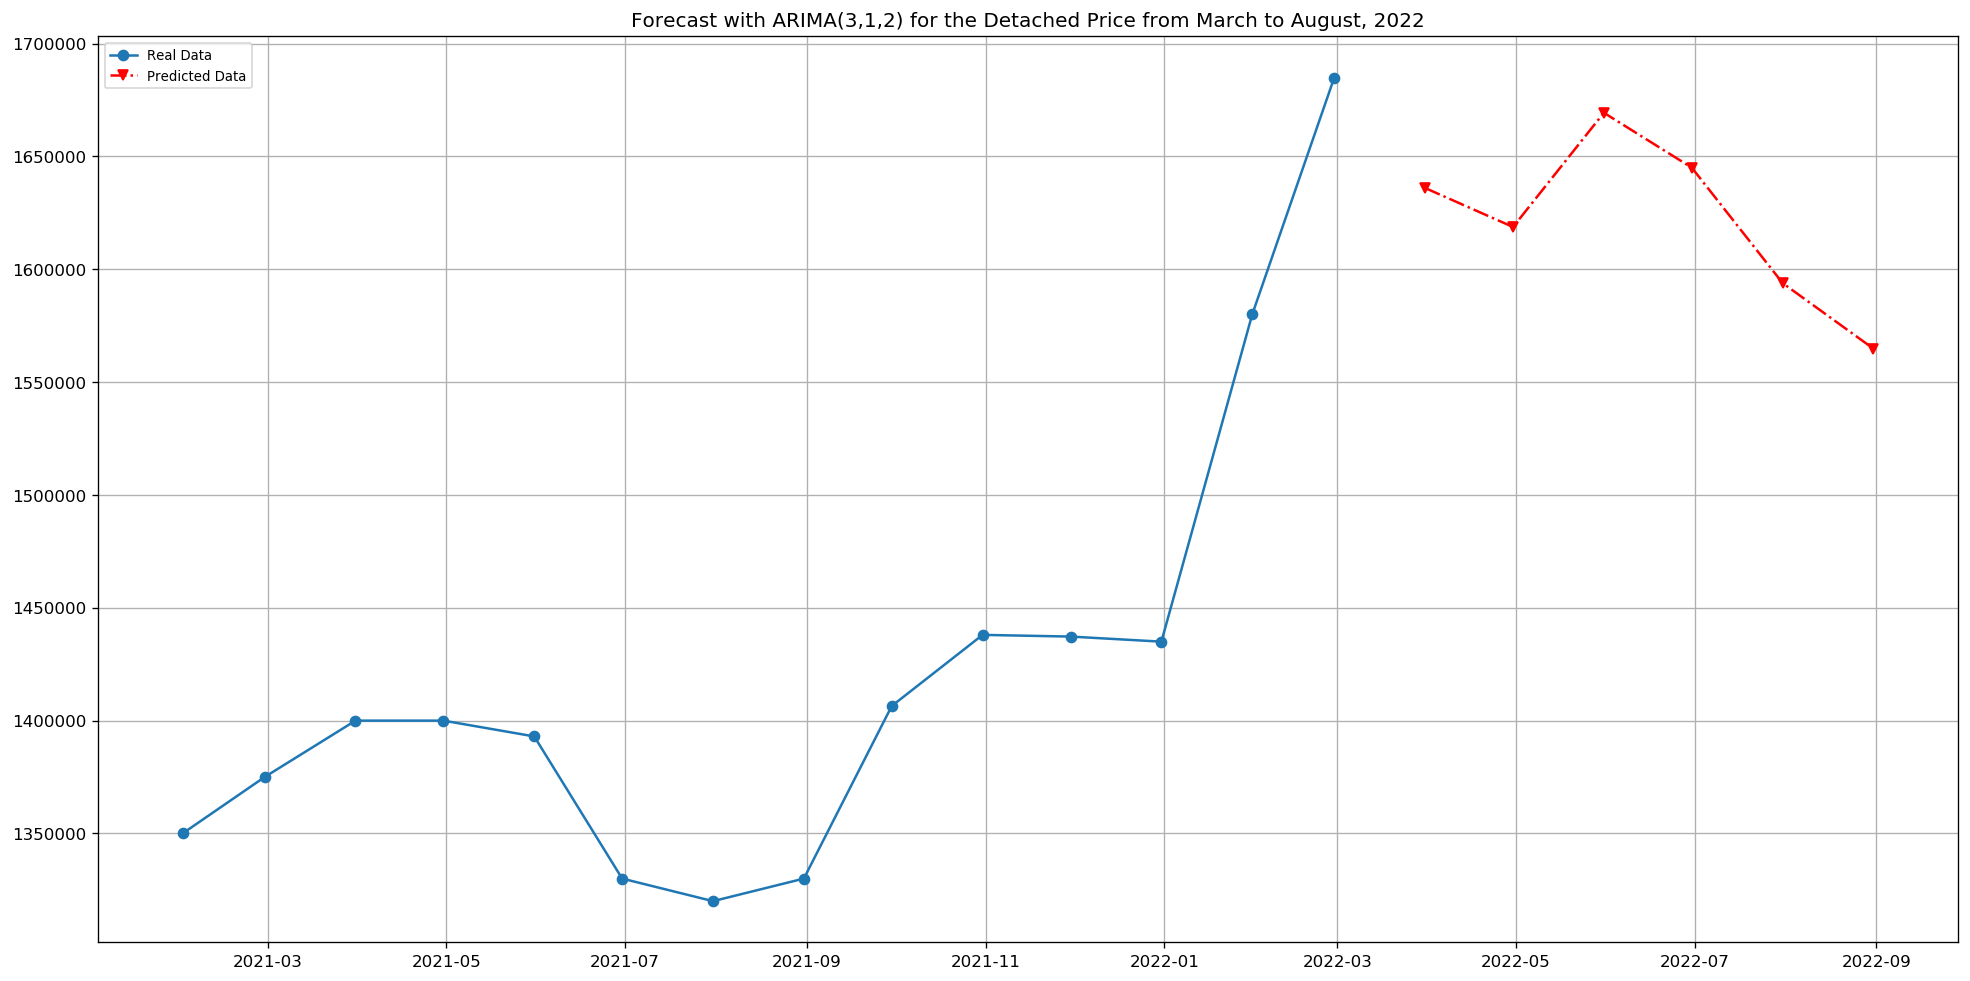

In [289]:

plt.figure(figsize=(20,10))
plt.title('Forecast with ARIMA(3,1,2) for the Detached Price from March to August, 2022' )
plt.plot(detached_2021_2022,linestyle='solid', marker='o', label='Real Data')
plt.plot(forcast_price_detached_ts,linestyle='-.',marker='v',color='r',label='Predicted Data')
plt.grid()
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#################################
###  CONDOS  ###
#################################

In [278]:
# ARIMA Model with p = 2, d = 1, and q = 3 for Condos
condo_mode213_all= ARIMA(Increase_rate_ts_condo.values, order=(2,1,3))
condo_mode213_all = condo_mode213_all.fit(disp=0)
print(condo_mode213_all.summary())

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  109
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 208.225
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sun, 27 Mar 2022   AIC                           -402.449
Time:                        21:10:51   BIC                           -383.610
Sample:                             1   HQIC                          -394.809
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.003      0.667      0.505      -0.003       0.007
ar.L1.D.y     -0.7064      0.060    -11.755      0.000      -0.824      -0.589
ar.L2.D.y     -0.8736      0.062    -14.033      0.0

In [279]:
# Forecast for next 6 months Condo price

fc_all_condo, se_all_condo, conf_all_condo = condo_mode213_all.forecast(6, alpha=0.05)
#index_all =  date_range('2022-03-01',periods=6,freq='M')
fc_series_all_condo = Series(fc_all_condo, index=index_all)

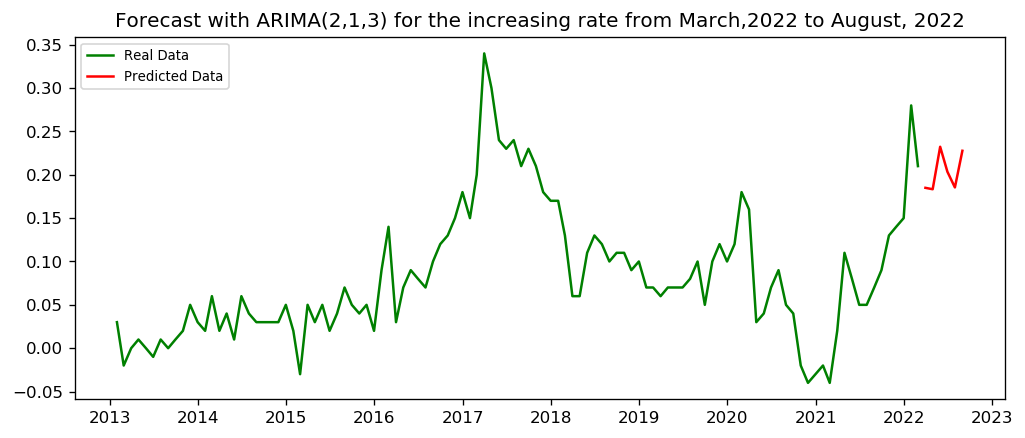

In [280]:

plt.figure(figsize=(10,4))
plt.plot(Increase_rate_ts_condo, label='Real Data', color='g')
plt.plot(fc_series_all_condo, label='Predicted Data', color='r')
plt.title('Forecast with ARIMA(2,1,3) for the increasing rate from March,2022 to August, 2022' )
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [281]:
###  Change the increasing rate to price

#  Increasing rate =  (this year's  price - last year's price)/ last year's price
#  This year's price = last year's price + last year's price *  Increasing_rate
forcast_price_condo = []
for i, v in  enumerate(fc_series_all_condo.index):
    this_year_price_condo =  price_ts_condo[v-12] + (price_ts_condo[v-12] * fc_series_all_condo[v])
    forcast_price_condo.append(this_year_price_condo)
    print(v)
    print(this_year_price_condo)
    print(price_ts_condo[v-12] )

2022-03-31 00:00:00
766668.0428136761
647000.0
2022-04-30 00:00:00
758509.4915038138
641000.0
2022-05-31 00:00:00
788673.0646816201
640000.0
2022-06-30 00:00:00
770227.3533304003
640000.0
2022-07-31 00:00:00
764585.1620156774
645000.0
2022-08-31 00:00:00
785729.493434892
640000.0


D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  import sys
D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  # This is added back by InteractiveShellApp.init_path()


In [282]:
forcast_price_condo_ts = Series(forcast_price_condo, index=index_all)
forcast_price_condo_ts

2022-03-31    766668.042814
2022-04-30    758509.491504
2022-05-31    788673.064682
2022-06-30    770227.353330
2022-07-31    764585.162016
2022-08-31    785729.493435
Freq: M, dtype: float64

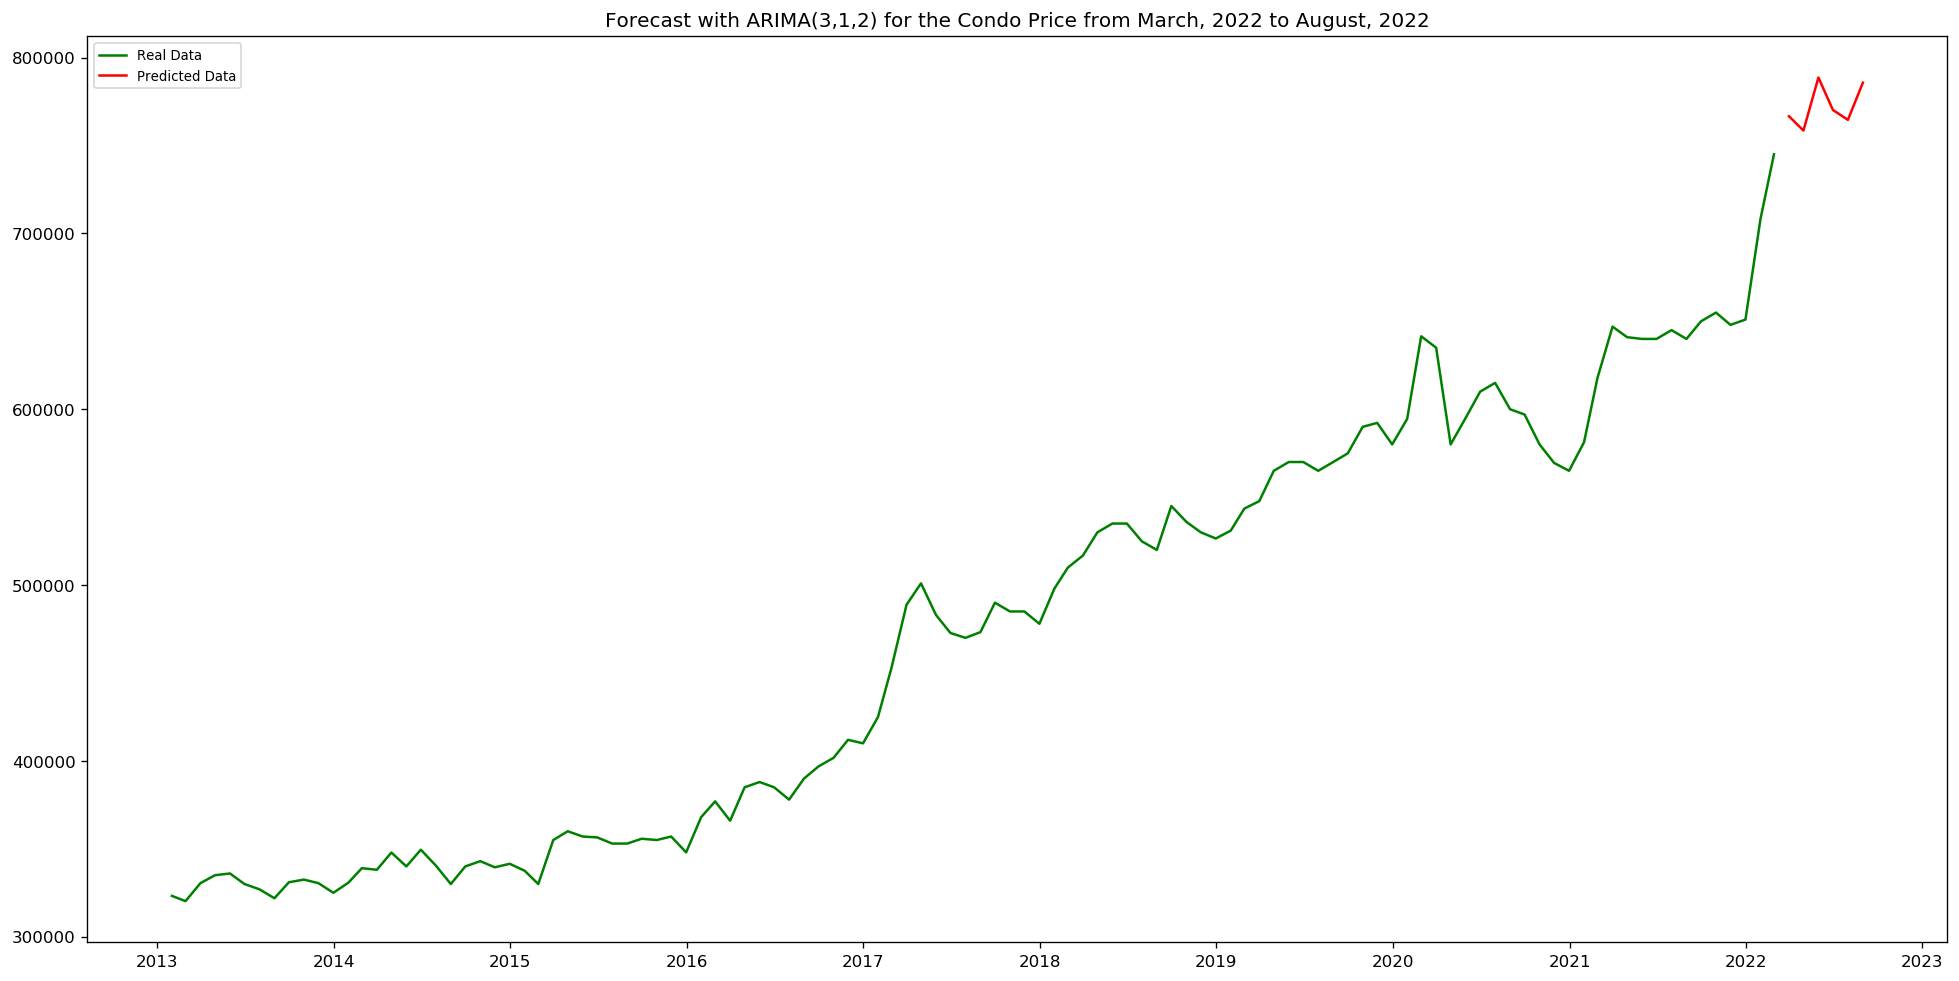

In [283]:

plt.figure(figsize=(20,10))
plt.plot(price_ts_condo, label='Real Data', color='g')
plt.plot(forcast_price_condo_ts, label='Predicted Data', color='r')
plt.title('Forecast with ARIMA(3,1,2) for the Condo Price from March, 2022 to August, 2022' )
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [290]:
condo_2021_2022 = price_ts_condo[-14:]
condo_2021_2022

2021-01-31    581250.0
2021-02-28    618000.0
2021-03-31    647000.0
2021-04-30    641000.0
2021-05-31    640000.0
2021-06-30    640000.0
2021-07-31    645000.0
2021-08-31    640000.0
2021-09-30    650000.0
2021-10-31    655000.0
2021-11-30    648000.0
2021-12-31    651000.0
2022-01-31    708000.0
2022-02-28    745000.0
Freq: M, dtype: float64

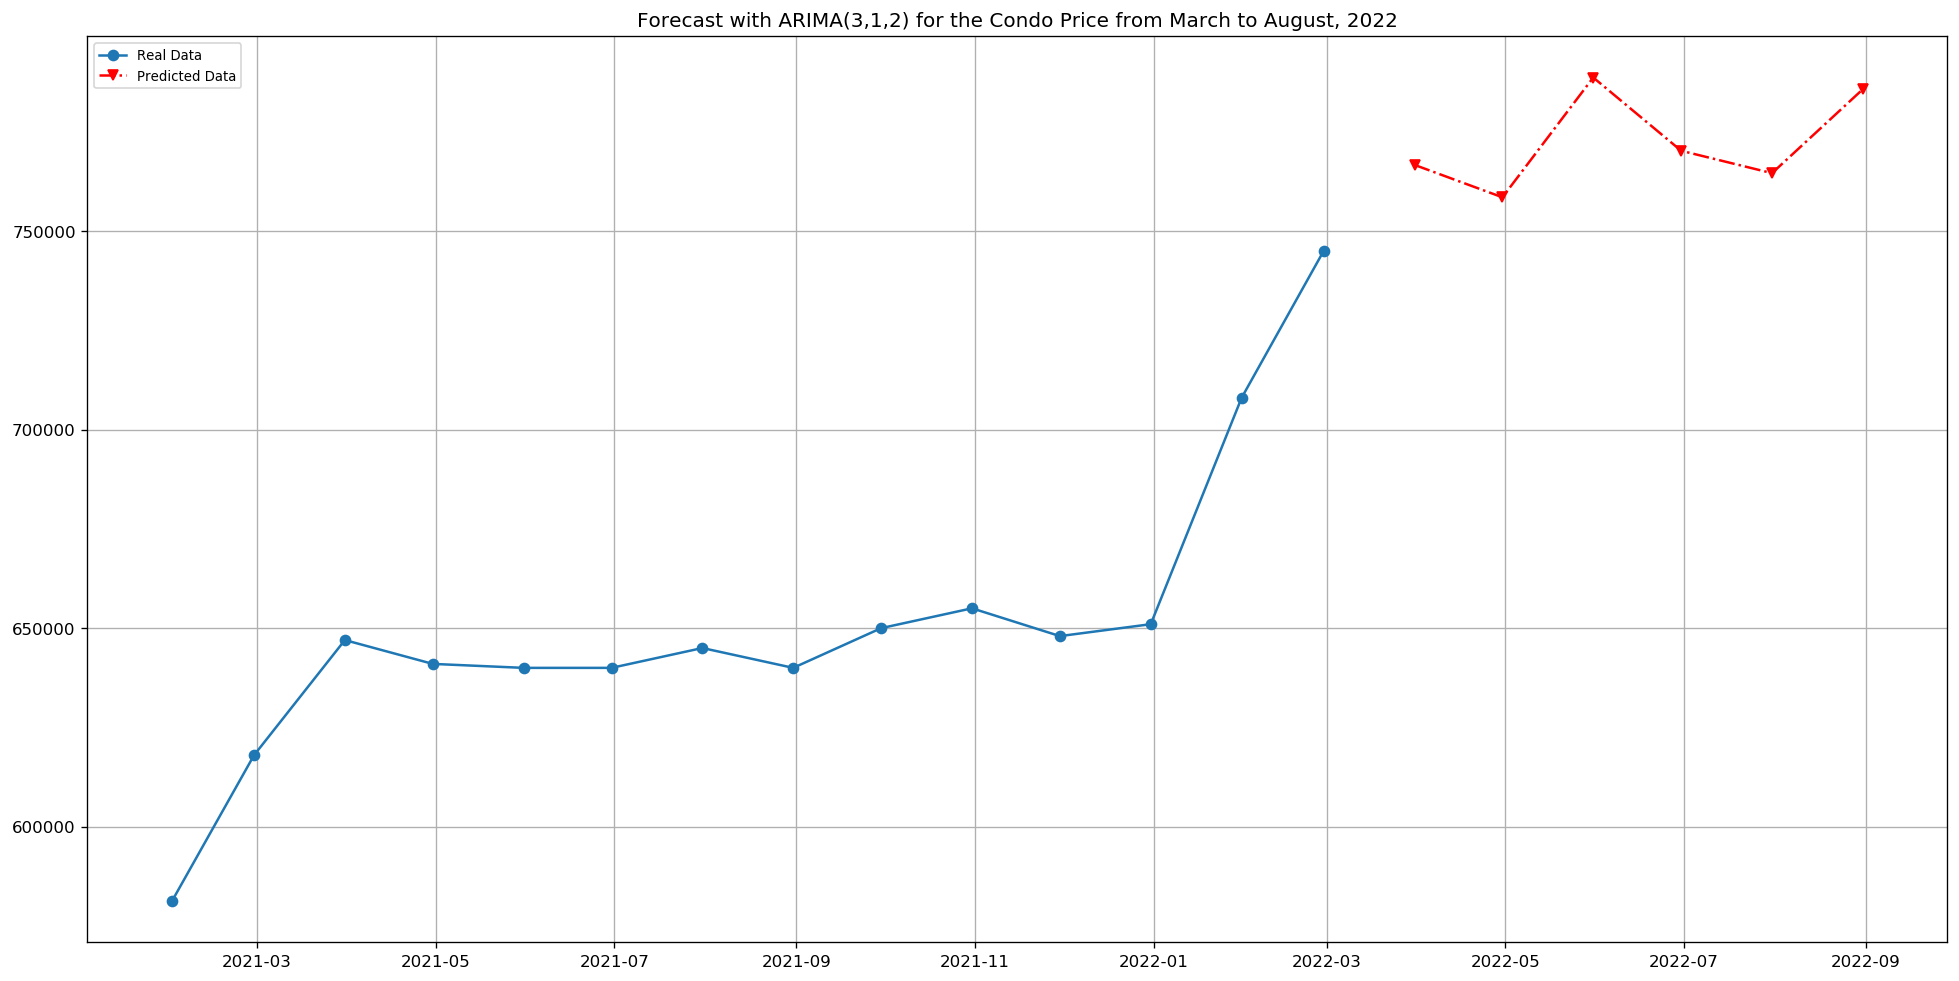

In [291]:
plt.figure(figsize=(20,10))
plt.title('Forecast with ARIMA(3,1,2) for the Condo Price from March to August, 2022' )
plt.plot(condo_2021_2022,linestyle='solid', marker='o', label='Real Data')
plt.plot(forcast_price_condo_ts,linestyle='-.',marker='v',color='r',label='Predicted Data')
plt.grid()
plt.legend(loc='upper left', fontsize=8)
plt.show()